In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


import torch
import torch.nn as nn 
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [5]:
transform = transforms.Compose([transforms.ToTensor()])

train_ok_path = 'dataset/archive/casting_data/casting_data/train_one_class'
trainset = torchvision.datasets.ImageFolder(train_ok_path, transform = transform)

trainloader = DataLoader(trainset, batch_size=4, shuffle = True)

print(len(trainset))
print(len(trainloader))

2875
719


In [11]:
from pl_bolts.models.autoencoders import AE

ae = AE(input_height=300)
print(AE.pretrained_weights_available())
ae = ae.from_pretrained('')

ae.freeze()

['cifar10-resnet18']


In [2]:
print(ae)

AE(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): EncoderBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): EncoderBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [24]:
def display_reconstructions(img_initiales, img_reconstruites, n=8):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        # image originale
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(img_initiales[i,:,:].permute(1,2,0),vmin=0,vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # image reconstruite
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(img_reconstruites[i,:,:].permute(1,2,0),vmin=0,vmax=1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


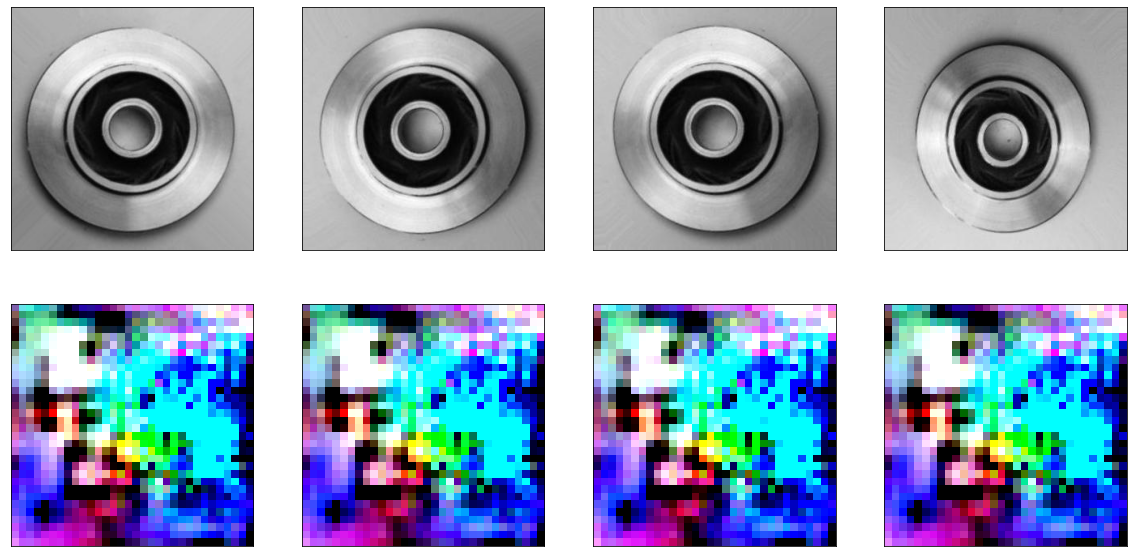

In [25]:
exemple = iter(trainloader)
image, label = next(exemple)
predictions = ae(image)

display_reconstructions(image,predcitions,n=4)
    